In [1]:
#ENTER YEAR --------
year = 2015
#-------------------

%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# df = pd.read_csv('data/locations_{}.csv'.format(year))
df = pd.read_csv('data/locations.csv')
df.tail()

,Year,Name_Orig,Lat_Orig,Lng_Orig,Name_Des,Lat_Des,Lng_Des,Distance (nm),Distance (mi),Distance (km)
83,2018,"Los Angeles, CA",33.9416,-118.4085,"Palm Springs, CA",33.8303,-116.5453,0.0,0.0,0.0
84,2018,"Palm Springs, CA",33.8303,-116.5453,"Paso Robles, CA",35.6370,-120.6550,0.0,0.0,0.0
85,2018,"Paso Robles, CA",35.6370,-120.6550,"Paso Robles, CA",35.6370,-120.6550,0.0,0.0,0.0
86,2018,"Paso Robles, CA",35.6370,-120.6550,"Montana De Oro, CA",35.2723,-120.8868,0.0,0.0,0.0
87,2018,"Paso Robles, CA",35.6370,-120.6550,"Los Angeles, CA",33.9416,-118.4085,0.0,0.0,0.0


In [2]:
def plot_travel(df, title):
    # Basemap parameter options here: http://matplotlib.org/basemap/api/basemap_api.html

    # US+Europe
    lat_0 = 0
    lon_0 = 0
    llcrnrlat = 20
    llcrnrlon = -140
    urcrnrlat = 65
    urcrnrlon = 20

    fig=plt.figure()
    m = Basemap(projection='merc', 
                lat_0=lat_0, lon_0=lon_0, lat_ts=20, area_thresh=500,
                llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                resolution='l')

    m.drawmapboundary(fill_color='#FFFFFF')
    m.fillcontinents(color='#B1B2B4',lake_color='#FFFFFF',zorder=0)

    m.drawcoastlines(linewidth=0.25, zorder=8)
    m.drawstates(linewidth=0.25, color='#A8A8A8', zorder=6)
    m.drawcountries(linewidth=0.25, color='#707070', zorder=7)

    for row in range(0,df.shape[0]): 
        lat_orig = df.loc[df.index[row],'Lat_Orig']
        lng_orig = df.loc[df.index[row],'Lng_Orig']
        lat_des  = df.loc[df.index[row],'Lat_Des']
        lng_des  = df.loc[df.index[row],'Lng_Des']
        m.drawgreatcircle(lon1=lng_orig, lat1=lat_orig, lon2=lng_des, lat2=lat_des,
                          linewidth=.5,color='#2E5FAC', zorder=9)
        x, y = m(lng_orig,lat_orig)
        m.scatter(x,y,2,marker='.',edgecolors='#CF5300',c='#CF5300', zorder=10)
        x, y = m(lng_des,lat_des)
        m.scatter(x,y,2,marker='.',edgecolors='#CF5300',c='#CF5300', zorder=10)

    plt.show()
    fig.savefig(title, dpi=350, bbox_inches='tight')

/Users/mkudija/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/mkudija/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mkudija/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/mkudija/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mkudija/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarnin

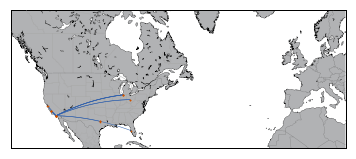

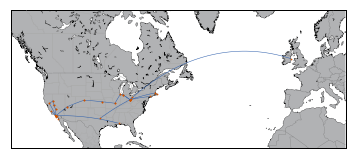

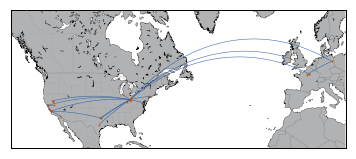

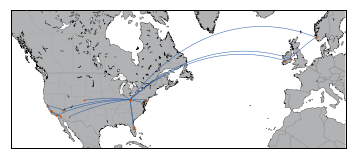

In [3]:
years = df.Year.unique()
for year in years:
    dfPlot = df[df['Year'].isin([year])]
    title = '{}_travel.png'
    plot_travel(dfPlot, title)